In [1]:
%load_ext autoreload
%autoreload 2
### HIER DIE METHODEN REIN WIR IN TRAINNLP 
import torch
from torch import nn

import train
import TorchRandomSeed
import modelClass
import dataloader
from torch.utils.data import SubsetRandomSampler
from time import time
seed =1
seedObject = TorchRandomSeed.TorchRandomSeed(seed=1) 

_t_start = time()

with seedObject:
    droplist = []#["BloodPressure", "Pregnancies", "Age", "SkinThickness"]
    num_epochs = 2
    batch_size = 32
    test_size = 0.5 # is going to be split again in eval and test
    device = "cuda:0" if torch.cuda.is_available() else "cpu"
    #dirPath = "/home/rosario/explainable/Bachelor/"# root
    dirPath= "./" 

    modelsDirPath = dirPath+ "Models"

    print("calculating on: " +str(device))
    lr = 0.001 #slowed learningrate # 0.1 after 20 epoch full

    # load data
  
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames, datasetType= dataloader.load_kaggle_diabetes_dataset(batch_size=batch_size)
    trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames, datasetType= dataloader.BreastCancerUCI(batch_size= batch_size, test_size=test_size)
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames= dataloader.dryBeanUCI(batch_size=batch_size , droplist= droplist)
    
    #model = modelClass.Net(inputFeatures= inputFeatures, out_features=outputFeatures)
    model= modelClass.BinaryClassification2HL64N(inputFeatures= inputFeatures, outputFeatures= outputFeatures)
    modelName = model.modelName
    
    #print(random_indices_test)

    #for i,c in testloader:
    #    print(i[0])
    #    print(X_test[random_indices_test[0]])
    #    break
    
    # Backward Propergation - loss and optimizer
    loss_function = nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(model.parameters(),lr=lr)
    optimizer = torch.optim.Adam(model.parameters())
    #grads = train.train(trainloader, model, num_epochs, device, y_train,loss_function, optimizer)    
    total_gradientsList =  train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
 
    #train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
    print(dirPath)

    import evalModel
    import plotResults
    from matplotlib import pyplot as plt
    print("evaluating ...")
    loaderList = [testloader]
    nameList = ["test"]
    yList = [y_test]
    evalModel.doALLeval(model, modelsDirPath, dirPath, loaderList, device,optimizer, loss_function, num_epochs, nameList, yList, inputFeatures, random_indices_test)
    #print(dirPath)
    print(modelsDirPath)

calculating on: cuda:0
(569,)
(569, 30)
tensor([[-0.2435, -0.2473,  0.2055,  ..., -0.3219, -0.3210, -0.3220],
        [-0.2397, -0.2066,  0.1991,  ..., -0.3178, -0.3167, -0.3183],
        [-0.2316, -0.2095,  0.2728,  ..., -0.3239, -0.3222, -0.3240],
        ...,
        [-0.2447, -0.1818,  0.2593,  ..., -0.3372, -0.3360, -0.3371],
        [-0.2309, -0.2157,  0.2257,  ..., -0.3165, -0.3153, -0.3164],
        [-0.2343, -0.2549,  0.2200,  ..., -0.3162, -0.3152, -0.3164]])
train:shuffel = True
eval:shuffel = True
Epoch: 0
      Training_acc: 0.5422535211267606
-------------------

Epoch: 1
      Training_acc: 0.6161971830985915
-------------------

NOTE: THESE SAVED MODELS ARE BEEING OVERWRITTEN ON NEXT RUN
./
evaluating ...


1it [00:00,  4.67it/s]

0.6385964912280702


2it [00:00,  4.87it/s]

0.22105263157894736


3it [00:00,  4.86it/s]

0.36140350877192984


4it [00:00,  4.85it/s]

0.36140350877192984


5it [00:01,  4.83it/s]

0.6385964912280702


6it [00:01,  4.78it/s]

0.6385964912280702


7it [00:01,  4.73it/s]

0.6385964912280702


8it [00:01,  4.69it/s]

0.6385964912280702


9it [00:01,  4.59it/s]

0.6385964912280702
Progess: 44.44%
test acc: 53.06%
test Loss: 0.69
-------------------


10it [00:02,  4.47it/s]

0.6385964912280702


11it [00:02,  4.36it/s]

0.6385964912280702


12it [00:02,  4.43it/s]

0.6385964912280702


13it [00:02,  4.50it/s]

0.6385964912280702


14it [00:03,  4.51it/s]

0.6385964912280702


15it [00:03,  4.56it/s]

0.6385964912280702


16it [00:03,  4.54it/s]

0.6385964912280702


17it [00:03,  4.61it/s]

0.6385964912280702


18it [00:03,  4.62it/s]

0.6385964912280702
Progess: 94.44%
test acc: 63.86%
test Loss: 0.69
-------------------
./Models


plotting trainingResults...
cosine_similarity
percentageWeightsSignDifference3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


weightsMagnitude3
L2Distance3
weightTrace3
averageGradientMagnitude3
plotting: GM GradientMagnitude averaged over features
GradientMagnitudePerFeature3
plotting: GM GradientMagnitude PerFeature
total_gradientsList
plotting: total gradient magnitude Averaged over number of grads in parameters


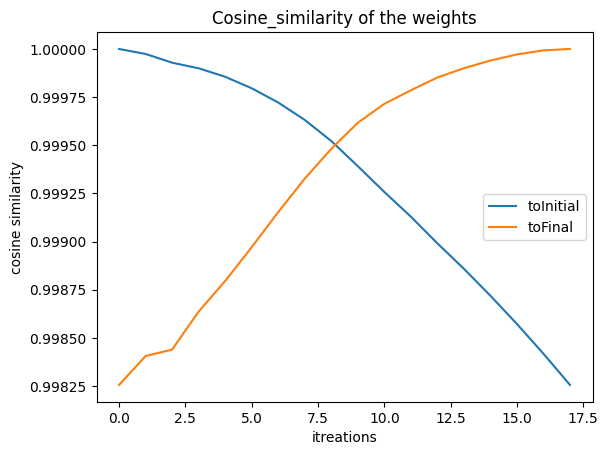

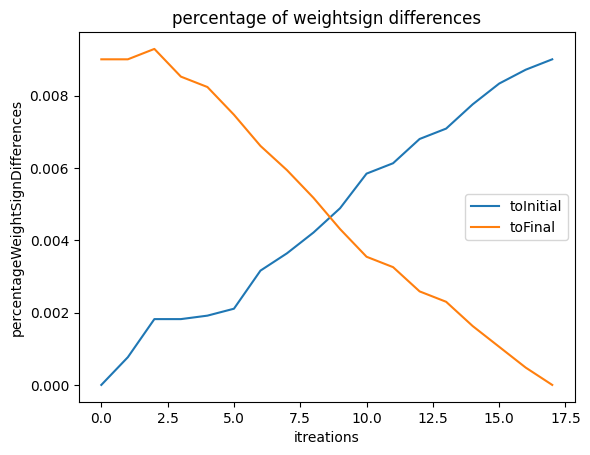

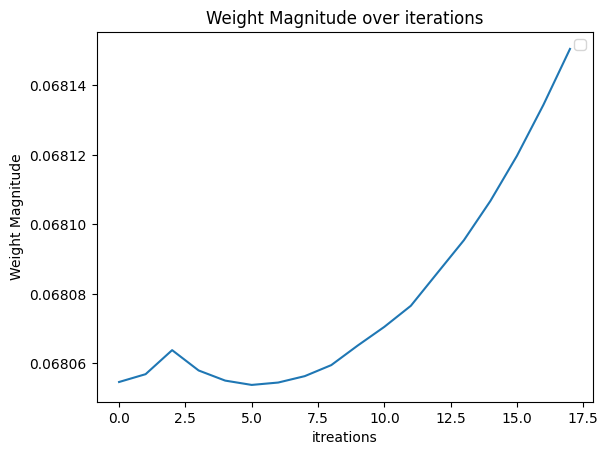

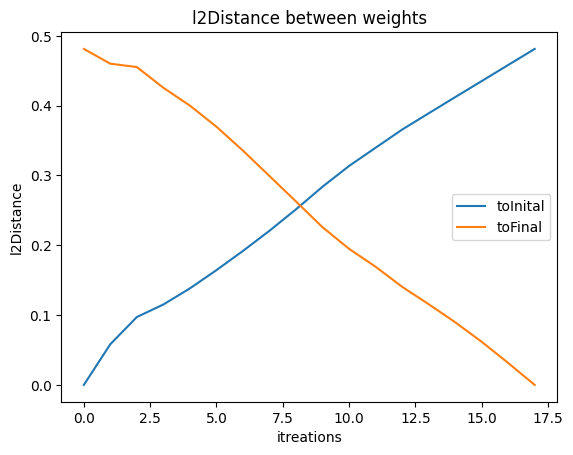

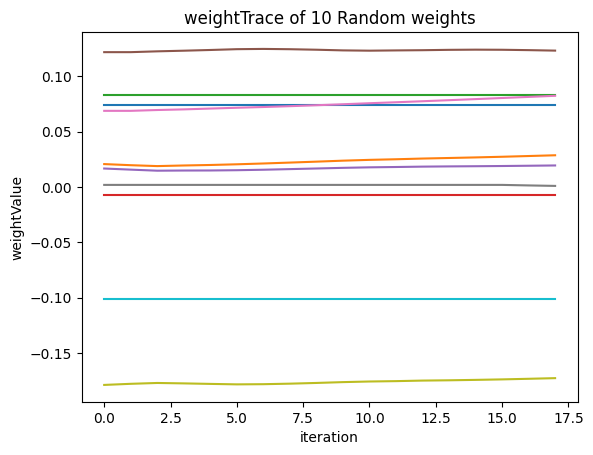

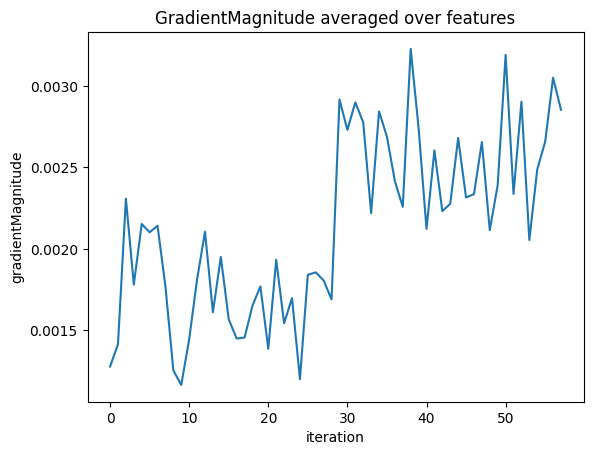

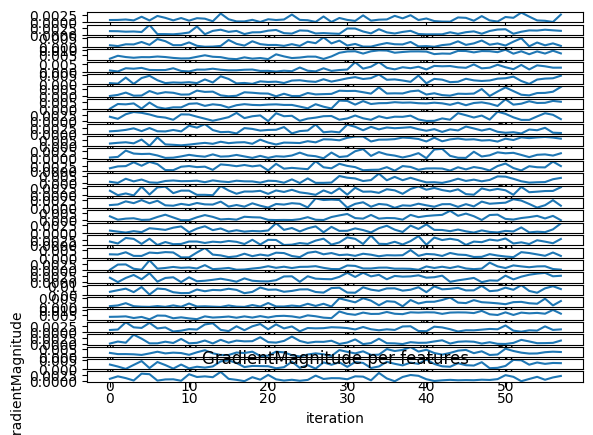

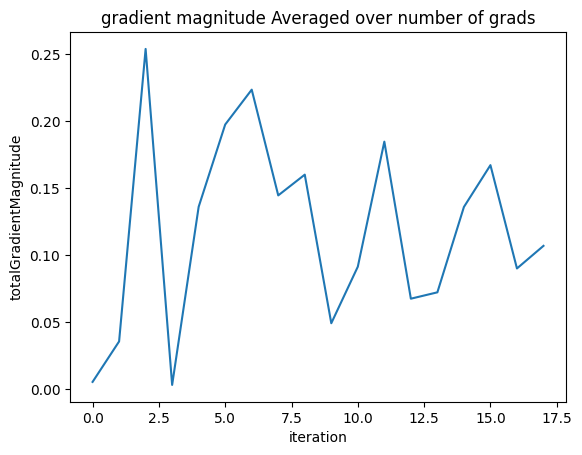

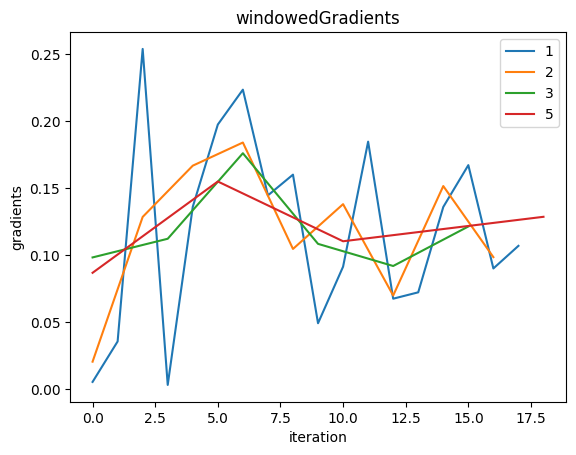

In [2]:
import utils
if datasetType == "NLP":
    dataPath= dirPath+ "NLP_Results/Trainingresults/"
else:
    dataPath= dirPath+ "Results/Trainingresults/"
utils.appendToNPZ(dataPath+ "data.npz", "Total_gradientsList_iteration", total_gradientsList)
data = utils.loadData(dataPath+ "data.npz")


plotResults.plotTrainingResults(data, dataPath)

In [3]:
import cega_utils
from datetime import datetime
import numpy as np

datasetType = "numerical"
now = datetime.now()
date_time_string = now.strftime("%Y-%m-%d %H:%M:%S")
# Replace space with underscore
date_time_string = date_time_string.replace(" ", "_")

pathToNPZ =  cega_utils.runCEGA(dirPath, modelsDirPath, model, X_test, device, data,date_time_string, testloader , datasetType)





(2, 29, 30)
numerical


  0%|          | 0/18 [00:00<?, ?it/s]

0


  6%|▌         | 1/18 [00:00<00:03,  5.36it/s]

1


 11%|█         | 2/18 [00:00<00:02,  5.62it/s]

2


 17%|█▋        | 3/18 [00:00<00:02,  5.72it/s]

3


 22%|██▏       | 4/18 [00:00<00:02,  5.73it/s]

4


 28%|██▊       | 5/18 [00:00<00:02,  5.78it/s]

5


 33%|███▎      | 6/18 [00:01<00:02,  5.81it/s]

6


 39%|███▉      | 7/18 [00:01<00:01,  5.81it/s]

7


 44%|████▍     | 8/18 [00:01<00:01,  5.84it/s]

8


 50%|█████     | 9/18 [00:01<00:01,  5.82it/s]

9


 56%|█████▌    | 10/18 [00:01<00:01,  5.75it/s]

10


 61%|██████    | 11/18 [00:01<00:01,  5.77it/s]

11


 67%|██████▋   | 12/18 [00:02<00:01,  5.78it/s]

12


 72%|███████▏  | 13/18 [00:02<00:00,  5.76it/s]

13


 78%|███████▊  | 14/18 [00:02<00:00,  5.77it/s]

14


 83%|████████▎ | 15/18 [00:02<00:00,  5.78it/s]

15


 89%|████████▉ | 16/18 [00:02<00:00,  5.76it/s]

16


 94%|█████████▍| 17/18 [00:02<00:00,  5.77it/s]

17


  0%|          | 0/18 [00:00<?, ?it/s]

acc
1.0
criterion:
0.8056815791722831
supportOfRule
0.6491228070175439
acc
0.0
criterion:
0.0
supportOfRule
0.5719298245614035
acc
0.0
criterion:
0.0
supportOfRule
0.2631578947368421
acc
0.0
criterion:
0.0
supportOfRule
0.4842105263157895
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.7745966692414834
supportOfRule
0.6
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4105263157894737
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.4
acc
0.0
criterion:
0.0
supportOfRule
0.4631578947368421
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.7058651528692202
supportOfRule
0.4982456140350877
acc
1.0
criterion:
0.67277899

  6%|▌         | 1/18 [00:09<02:35,  9.17s/it]

acc
0.8141025641025641
criterion:
0.6023084994958998
supportOfRule
0.5473684210526316
acc
0.16153846153846155
criterion:
0.10910011002788754
supportOfRule
0.45614035087719296
acc
0.7791411042944786
criterion:
0.5892335796501793
supportOfRule
0.5719298245614035
acc
0.8
criterion:
0.5803810000880093
supportOfRule
0.5263157894736842
acc
0.7891891891891892
criterion:
0.6358351922116396
supportOfRule
0.6491228070175439
acc
0.21081081081081082
criterion:
0.16984638696064347
supportOfRule
0.6491228070175439
acc
0.8319327731092437
criterion:
0.5375752726985266
supportOfRule
0.41754385964912283
acc
0.15789473684210525
criterion:
0.10786263964167997
supportOfRule
0.4666666666666667
acc
0.21637426900584794
criterion:
0.16760278808149054
supportOfRule
0.6
acc
0.13861386138613863
criterion:
0.08251728281292267
supportOfRule
0.3543859649122807
acc
0.8359375
criterion:
0.5602171023401428
supportOfRule
0.44912280701754387
acc
0.8292682926829268
criterion:
0.5447850561287985
supportOfRule
0.43157894736

 11%|█         | 2/18 [00:18<02:24,  9.06s/it]

acc
1.0
criterion:
0.7254762501100116
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
1.0
criterion:
0.5298129428260175
supportOfRule
0.2807017543859649
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.7254762501100116
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.4280701754385965
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.7326950970650465
supportOfRule
0.5368421052631579
acc
1.0
criterion:
0.5556725023109939
supportOfRule
0.3087719298245614
acc
0.0
criterion:
0.0
supportOfRule
0.45263157894736844
acc
0.0
criterion:
0.0
supportOfRule
0.45964912280701753
acc
0.0
criterion:
0.0
supportOfRule
0.45964912280701753
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.75

 17%|█▋        | 3/18 [00:25<02:05,  8.35s/it]

acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
0.0
criterion:
0.0
supportOfRule
0.43859649122807015
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.4421052631578947
acc
0.0
criterion:
0.0
supportOfRule
0.43859649122807015
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
1.0
criterion:
0.7254762501100116
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.45964912280701753
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.7745966692414834
supportOfRule
0.6
acc
0.0
criterion:
0.0
supportOfRule
0.43859649122807015
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0


 22%|██▏       | 4/18 [00:34<01:57,  8.39s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.7326950970650465
supportOfRule
0.5368421052631579
acc
0.0
criterion:
0.0
supportOfRule
0.45964912280701753
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.7562604211258206
supportOfRule
0.5719298245614035
acc
1.0
criterion:
0.7745966692414834
supportOfRule
0.6
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.34035087719298246
acc
0.0
criterion:
0.0
supportOfRule
0.3543859649122807
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.4982456140350877
acc
0.0
criterion:
0.0
supportOfRule


 28%|██▊       | 5/18 [00:43<01:52,  8.67s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
0.0
criterion:
0.0
supportOfRule
0.43859649122807015
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.7562604211258206
supportOfRule
0.5719298245614035
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.7254762501100116
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRul

 33%|███▎      | 6/18 [00:51<01:41,  8.45s/it]

acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.45263157894736844
acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
0.0
criterion:
0.0
supportOfRule
0.45263157894736844
acc
0.0
criterion:
0.0
supportOfRule
0.43859649122807015
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.7254762501100116
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.43859649122807015
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRu

 39%|███▉      | 7/18 [00:58<01:27,  7.95s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
0.0
criterion:
0.0
supportOfRule
0.40350877192982454
acc
0.0
criterion:
0.0
supportOfRule
0.4280701754385965
acc
0.0
criterion:
0.0
supportOfRule
0.4070175438596491
acc
0.0
criterion:
0.0
supportOfRule
0.4070175438596491
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.428070175438

 44%|████▍     | 8/18 [01:05<01:17,  7.74s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6407232755171874
supportOfRule
0.4105263157894737
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.43859649122807015
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
1.0
criterion:
0.7398435111918139
supportOfRule
0.5473684210526316
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035

 50%|█████     | 9/18 [01:12<01:06,  7.35s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6701662532667129
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6407232755171874
supportOfRule
0.4105263157894737
acc
0.0
criterion:
0.0
supportOfRule
0.4456140

 56%|█████▌    | 10/18 [01:17<00:53,  6.73s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.2771929824561403
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
1.0
criterion:
0.6701662532667129
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.

 61%|██████    | 11/18 [01:23<00:45,  6.53s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
1.0
criterion:
0.7398435111918139
supportOfRule
0.5473684210526316
acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6701662532667129
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.5719298245614035
acc
1.0
criterion:
0.6127304435812114
supportOfRule
0.37543859649122807
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
1.0
criterion

 67%|██████▋   | 12/18 [01:29<00:38,  6.46s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6701662532667129
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
1.0
criterion:
0.6407232755171874
supportOfRule
0.4105263157894737
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
1

 72%|███████▏  | 13/18 [01:35<00:31,  6.39s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6701662532667129
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6701662532667129
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6407232755171874
supportOfRule
0.4105263157894737
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.45964912280701753
acc
1.0
criterion:
0.7398435111918139
supportOfRule
0.5473684210526316
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOf

 78%|███████▊  | 14/18 [01:41<00:24,  6.16s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.5719298245614035
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6701662532667129
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
1.0
criterion:
0.6701662532667129
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6701662532667129
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
0.0
criterion:
0.0
supportOfRule
0.435087719

 83%|████████▎ | 15/18 [01:47<00:18,  6.07s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6701662532667129
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
1.0
criterion:
0.6407232755171874
supportOfRule
0.4105263157894737
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6779742788683193
supportOfRule
0.45964912280701753
acc
1.0
criterion:
0.7326950970650465
supportOfRule
0.5368421052631579
acc
1.0
criterion:
0.774596669241

 89%|████████▉ | 16/18 [01:53<00:12,  6.06s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
1.0
criterion:
0.7058651528692202
supportOfRule
0.4982456140350877
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
0.0
criterion:
0.0
supportOfRule
0.5719298245614035
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6622661785325219
supportOfRule
0.43859649122807015
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
1.0
criterion:
0.6779742788683193
supportOfRule
0.45964912280701753
acc
1.0
criterion:
0.6407232755171874
supportOfRule
0.4105263157894737
acc
0.0
criterion:
0.0
supportOfRule
0.4
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6701662532667129
supportOfRu

 94%|█████████▍| 17/18 [01:58<00:05,  5.76s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
1.0
criterion:
0.7398435111918139
supportOfRule
0.5473684210526316
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6779742788683193
supportOfRule
0.45964912280701753
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6701662532667129
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.5719298245614035
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6622661785325219
supportOfRule
0.43859649122807015
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.4842105263157895
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
0.0
criterion:
0.0
supportOfRu

100%|██████████| 18/18 [02:02<00:00,  6.82s/it]


In [5]:
import os
rules_data = np.load(pathToNPZ , allow_pickle=True)

pathToDiscriminative_rules = "./Results/rulesResults/discriminative_rules/"
pathToCharacteristic_rules = "./Results/rulesResults/characteristic_rules"
resultPaths_dicriminative_rules = os.listdir(pathToDiscriminative_rules)
resultPaths_characteristic_rules = os.listdir(pathToCharacteristic_rules)
resultPaths_dicriminative_rules= np.sort(resultPaths_dicriminative_rules)

#get last generated rule

mostRecentResultPaths_discriminative = pathToDiscriminative_rules + (resultPaths_dicriminative_rules[-1])
data = utils.loadData(mostRecentResultPaths_discriminative)
temp_rules_list_overIterations = data["rules_list_overIterations"]

trackedRules_OHE = cega_utils.trackRulesList(temp_rules_list_overIterations,data["rulePrecisionListPerRule_overIterations"])
print(pathToNPZ)
utils.appendToNPZ(pathToNPZ, "trackedRules_OHE", trackedRules_OHE)

plotResults.plotRulesResults(data)
_t_end = time()
print(f"Training finished in {int(_t_end - _t_start)} s")

IndexError: list index out of range